### Kütüphaneleri yükledik


In [79]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer  # for missing data
from sklearn import preprocessing  # for Dummy Variable
from sklearn.model_selection import train_test_split  # to split data into train and test
from sklearn.preprocessing import StandardScaler  # for scaling

import warnings

warnings.simplefilter('ignore')

### Dataset'leri içe aktardık


In [80]:
train = pd.read_csv(
    'C:\\Users\\Genos\\Projeler\\Python İle Makine Öğrenmesi\\Projeler\\Titanic(ML)\\datasets\\train.csv')
test = pd.read_csv('C:\\Users\\Genos\\Projeler\\Python İle Makine Öğrenmesi\\Projeler\\Titanic(ML)\\datasets\\test.csv')
test_survived = pd.read_csv(
    'C:\\Users\\Genos\\Projeler\\Python İle Makine Öğrenmesi\\Projeler\\Titanic(ML)\\datasets\\gender_submission.csv')

Burada sonrasında train test split veya cross validation kullanacağımız için hepsini tek bir data olarak topluyoruz ya da görselleştirmede daha büyük bir veri setimiz olduğu için farklı şeyler fark edebiliriz.

In [81]:
all_test = pd.merge(test, test_survived, on='PassengerId')
all_data = pd.concat([train, all_test], axis=0)

In [82]:
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Datamıza kısa bir bakış attık

In [83]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [84]:
all_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


### Kategorik ve Numerik kolonları ayırdık

In [85]:
all_data._get_numeric_data().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [86]:
df_num = all_data[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = all_data[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

### Numerik kolon dağılımlarına baktık

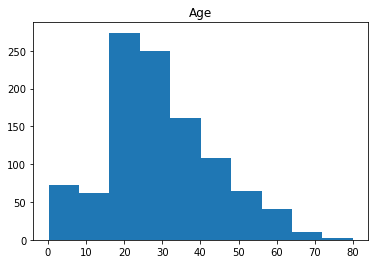

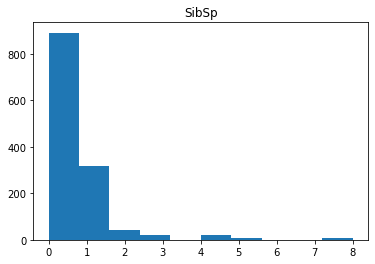

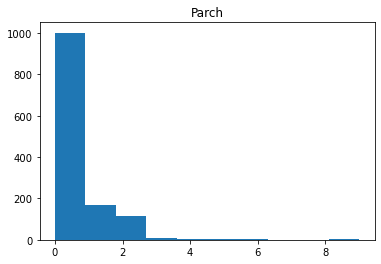

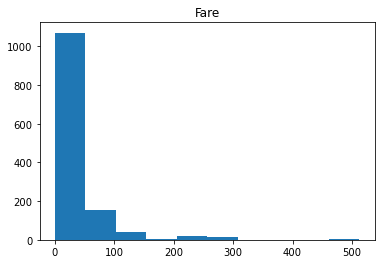

In [87]:
from matplotlib import pyplot as plt

for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

### Numerik kolonların birbirleriyle ilişkisine baktık (Korelasyon)

            Age     SibSp     Parch      Fare
Age    1.000000 -0.243699 -0.150917  0.178740
SibSp -0.243699  1.000000  0.373587  0.160238
Parch -0.150917  0.373587  1.000000  0.221539
Fare   0.178740  0.160238  0.221539  1.000000


<AxesSubplot:>

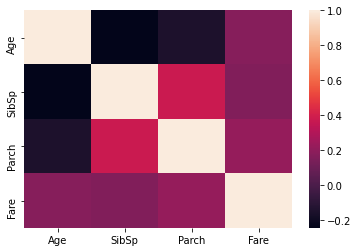

In [88]:
import seaborn as sns

print(df_num.corr())
sns.heatmap(df_num.corr())

### Hayatta kalma ile Age, Fare, Parch, SibSp'yi karşılaştırdık

In [89]:
# burada mesela hayatta kalanların yaş ortalamasına baktık
pd.pivot_table(train, index='Survived', values=df_num.columns)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


### Katergorik verilerin bar plot'una (histogram) baktık

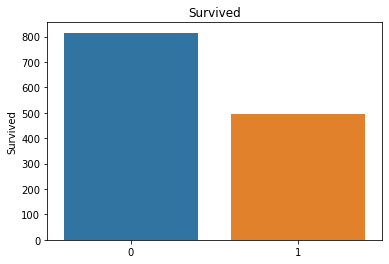

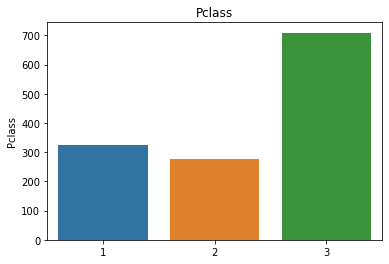

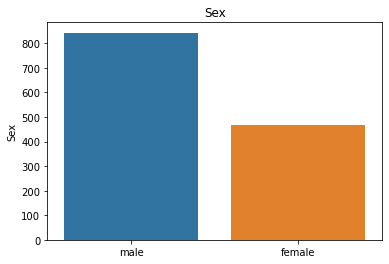

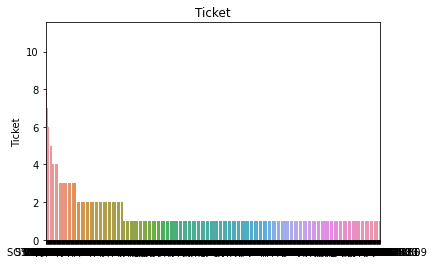

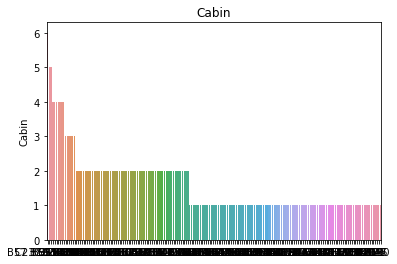

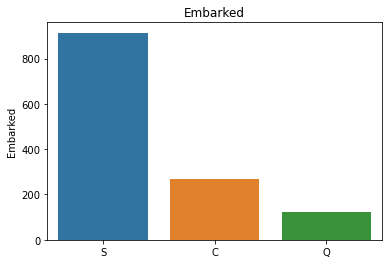

In [90]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index, df_cat[i].value_counts()).set_title(i);
    plt.show()

### Pclass, Sex ve Embarked'ın hayatta kalma ile ilgisine baktık

In [91]:
print(pd.pivot_table(train, index='Survived', columns='Pclass', values='Ticket', aggfunc='count'))
print()
print(pd.pivot_table(train, index='Survived', columns='Sex', values='Ticket', aggfunc='count'))
print()
print(pd.pivot_table(train, index='Survived', columns='Embarked', values='Ticket', aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


### Cabin bilgisini dummy'leştirdik ve hayatta kalma ile ilişkisine baktık

In [98]:
train['cabin_multiple'] = train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

train['cabin_multiple']

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: cabin_multiple, Length: 891, dtype: int64

In [99]:
train['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [93]:
print(pd.pivot_table(train, index='Survived', columns='cabin_multiple', values='Ticket', aggfunc='count'))

cabin_multiple      0      1    2    3    4
Survived                                   
0               481.0   58.0  7.0  3.0  NaN
1               206.0  122.0  9.0  3.0  2.0


In [102]:
train['cabin_adv'] = train.Cabin.apply(lambda x: str(x)[0])

train['cabin_adv']

0      n
1      C
2      n
3      C
4      n
      ..
886    n
887    B
888    n
889    C
890    n
Name: cabin_adv, Length: 891, dtype: object